In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

##  Load book data
This book data was directly taken from a Kaggle dataset containing 7K rows of book information.

In [3]:
df_ = pd.read_csv('books.csv')
df = df_
df.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0


## Cleaning Dataset
We start off by cleaning the description column as we will need to use it for our model.

In [4]:
#Let's see if there are any nulls.
df[df["description"].isnull()]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6786,9783425040844,3425040847,In the Country of Last Things,Hauptbd.,Paul Auster,NaN,http://books.google.com/books/content?id=hdWax...,NaN,2001.0,3.91,188.0,6230.0
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0


In [ ]:
#262 rows have nulls in them. 
#In this case, I am going to remove any nulls because without a description, I won't be able to use them in my predictions.
df['description'] = df['description'].fillna('') 

In [6]:
#Clean titles to take out unwanted spaces and take out duplicates
df['title'] = df['title'].str.strip()
df= df.drop_duplicates(subset='title', keep='first')

In [7]:
indices = pd.Series(df.index, index=df['title'])
indices.index.value_counts()

Strong Opinions                                         1
Inside the Mind of Gideon Rayburn                       1
Time's Arrow, Time's Cycle                              1
Fergus and the Night-Demon                              1
Good Omens                                              1
                                                       ..
Logs Seven and Eight                                    1
American Pastoral                                       1
The Complete Short Stories Of Robert Louis Stevenson    1
The Good Housekeeping Illustrated Cookbook              1
The Body                                                1
Name: title, Length: 6398, dtype: int64

### Removing Stop Words

1. **Reduction of Noise:** Stop words appear frequently in a text and may dominate the word frequency distribution. By removing them, we can focus on the more important and meaningful words that carry more semantic value.

2. **Memory and Processing Efficiency:** Stop words consume memory and processing resources during text analysis tasks. Removing them can reduce the computational burden and improve the efficiency of algorithms.

3. **Improved Semantics:** Removing stop words can enhance the interpretability and accuracy of text analysis models by reducing the influence of irrelevant words and focusing on content-rich terms.

In [8]:
# Initialize CountVectorizer to convert text into vectors
vectorizer = CountVectorizer(stop_words='english')

# Create the term-document matrix
term_matrix = vectorizer.fit_transform(df['description'])

# Calculate cosine similarity
cosine_sim = cosine_similarity(term_matrix, term_matrix)

## What is Cosine Similarity?

1. The cosine similarity ranges from 0 to 1, where 1 indicates that two documents are exactly similar, and 0 indicates no similarity. The diagonal elements of the matrix have a similarity of 1 since each document is compared to itself.

2. The cosine similarity matrix can be useful in various tasks such as document clustering, document retrieval, or identifying similar documents.

In [9]:
def get_recommendations(title, cosine_sim, df, num_recommendations=5):
    title_lower = title.lower().strip()  # Remove leading and trailing whitespaces from the user input
    try:
        # Get the index of the book that matches the title
        idx = df[df['title'].str.lower().str.strip() == title_lower].index[0]
        print(f"Book '{title}' found. Generating recommendations based on title matching.")
    except IndexError:
        print(f"Book '{title}' not found. Generating recommendations based on description matching.")
        # Get the user input
        user_input = title.lower()

        # Preprocess the user input
        vectorizer = CountVectorizer(stop_words='english')
        user_matrix = vectorizer.fit_transform([user_input])

        # Preprocess all book descriptions
        term_matrix = vectorizer.transform(df['description'])

        # Calculate the cosine similarity between the user input and all book descriptions
        sim_scores = cosine_similarity(user_matrix, term_matrix)

        # Flatten the similarity scores
        sim_scores = sim_scores.flatten()

        # Sort the books based on the similarity scores
        sim_indices = sim_scores.argsort()[::-1]

        # Get the indices of the top similar books
        top_indices = sim_indices[:num_recommendations]
    else:
        # Get the pairwise similarity scores of all books with the given book
        sim_scores = list(enumerate(cosine_sim[idx]))
        # Sort the books based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # Get the indices of the top similar books
        top_indices = [i for i, _ in sim_scores[1:num_recommendations + 1]]

    # Retrieve the recommendations from the original DataFrame without modifying it
    recommendations = df.iloc[top_indices].copy()

    # Select specific columns for the recommendations
    selected_columns = ['title', 'authors', 'description', 'average_rating', 'categories', 'num_pages', 'thumbnail']
    recommendations = recommendations[selected_columns]

    return recommendations

1. **Finding the Index:** The function first tries to find the index of the book that matches the given title in the DataFrame df. If the book is not found, it raises an IndexError exception.

2. **Generating Recommendations:** If the book is found, the function proceeds to generate recommendations based on the cosine similarity scores. It does this in two ways:

If the book is found in the DataFrame, it retrieves the pairwise similarity scores of all other books with the given book. If the book is not found, it prompts the user to input a book description. It then preprocesses the user input and calculates the cosine similarity between the user input and all book descriptions.

4. **Sorting Recommendations:** After obtaining the similarity scores, the function sorts the books based on these scores in descending order.

5. **Returning Top Recommendations:** Finally, the function returns the titles of the top similar books based on the number of recommendations specified.

By using this function, you can provide a book title and receive a list of recommended books that are similar to the input book. The recommendations are based on the cosine similarity between book descriptions, allowing the system to suggest books with similar content or themes.

In [10]:
user_input = 'the lord of the ring'
book_recommendations = get_recommendations(user_input, cosine_sim, df)
book_recommendations

Book 'the lord of the ring' not found. Generating recommendations based on description matching.


,title,authors,description,average_rating,categories,num_pages,thumbnail
80,The Return of the King,J. R. R. Tolkien,THE GREATEST FANTASY EPIC OF OUR TIME While th...,4.52,"Baggins, Frodo (Fictitious character)",554.0,http://books.google.com/books/content?id=PI9zP...
3709,The Two Towers,John Ronald Reuel Tolkien,The standard hardcover edition of the second v...,4.44,Fiction,328.0,http://books.google.com/books/content?id=Bv6Fx...
595,The Talisman Ring,Georgette Heyer,A witty and enthralling Regency romance by one...,4.00,Great Britain,268.0,http://books.google.com/books/content?id=7Efhi...
3722,The Return of the Shadow,John Ronald Reuel Tolkien;Christopher Tolkien,In this sixth volume of The History of Middle-...,4.02,Fiction,512.0,http://books.google.com/books/content?id=CzXSh...
2218,Shards of a Broken Crown,Raymond E. Feist,The demon is no more. The enemy has been route...,4.01,Fiction,498.0,http://books.google.com/books/content?id=jITPl...


## Displaying recommended books and description

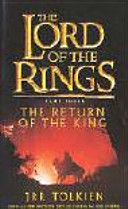

**The Return of the King** - J. R. R. Tolkien

**Categories**: Baggins, Frodo (Fictitious character) 

THE GREATEST FANTASY EPIC OF OUR TIME While the evil might of the Dark Lord Sauron swarmed out to conquer all Middle-earth, Frodo and Sam struggled deep into Mordor, seat of Sauron's power. To defeat the Dark Lord, the accursed Ring of Power had to be destroyed in the fires of Mount Doom. But the way was impossibly hard, and Frodo was weakening. Weighed down by the compulsion of the Ring he began finally to despair. The awesome conclusion of J.R.R. Tolkien's The Lord of the Rings, beloved by millions of readers around the world.


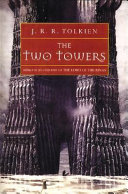

**The Two Towers** - John Ronald Reuel Tolkien

**Categories**: Fiction 

The standard hardcover edition of the second volume of The Lord of the Rings includes a large format fold-out map. Frodo and his Companions of the Ring have been beset by danger during their quest to prevent the Ruling Ring from falling into the hands of the Dark Lord by destroying it in the Cracks of Doom. They have lost the wizard, Gandalf, in a battle in the Mines of Moria. And Boromir, seduced by the power of the Ring, tried to seize it by force. While Frodo and Sam made their escape, the rest of the company was attacked by Orcs. Now they continue the journey alone down the great River Anduin -- alone, that is, save for the mysterious creeping figure that follows wherever they go.


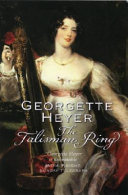

**The Talisman Ring** - Georgette Heyer

**Categories**: Great Britain 

A witty and enthralling Regency romance by one of the best-known and most beloved historical novelists. The legend of the Headless Horseman and a proposed marriage de convenance both have their impact on the mystery of a golden talisman ring and Lord Lavenham's young heir, Ludovic. Neither Sir Tristram Shield nor Eustacie, his young French cousin, share the slightest inclination to marry one another, yet it is Lord Lavenham's dying wish. For there is no one else to provide for the old man's granddaughter while Ludovic remains a fugitive from justice ... Yet again Georgette Heyer shows the qualities that made her one of the most successful and best-loved romantic novelists of her age, and why her popularity endures to this day.


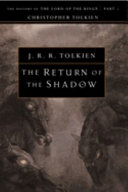

**The Return of the Shadow** - John Ronald Reuel Tolkien;Christopher Tolkien

**Categories**: Fiction 

In this sixth volume of The History of Middle-earth the story reaches The Lord of the Rings. In The Return of the Shadow (an abandoned title for the first volume) Christopher Tolkien describes, with full citation of the earliest notes, outline plans, and narrative drafts, the intricate evolution of The Fellowship of the Ring and the gradual emergence of the conceptions that transformed what J.R.R. Tolkien for long believed would be a far shorter book, 'a sequel to The Hobbit'. The enlargement of Bilbo's 'magic ring' into the supremely potent and dangerous Ruling Ring of the Dark Lord is traced and the precise moment is seen when, in an astonishing and unforeseen leap in the earliest narrative, a Black Rider first rode into the Shire, his significance still unknown. The character of the hobbit called Trotter (afterwards Strider or Aragorn) is developed while his indentity remains an absolute puzzle, and the suspicion only very slowly becomes certainty that he must after all be a Man. Th

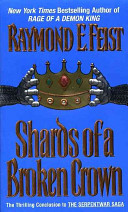

**Shards of a Broken Crown** - Raymond E. Feist

**Categories**: Fiction 

The demon is no more. The enemy has been routed. But all is not well . . . Winter's icy grasp is loosening on the world. The Emerald Queen's vanquished army has its broken back to the Bitter Sea. And treachery is its only recourse. A lackey has declared himself Lord of the defeated, amassing the still fearsome remnants of a ruthless fighting force together for one final assault on a weakened, vulnerable realm. For the warriors who remained steadfast against terrible numbers, for the courageous souls who barely survived a devastating onslaught upon their homeland, the time to rebuild and renew has not yet come. The war is not over in Midkemia. And Jimmy and Dash—two young noble brothers who stand at the center of a gathering storm—are impelled to action that could secure a tenuous peace . . . or turn triumph into catastrophe. The demon is no more. The enemy has been routed. But all is not well . . .


In [11]:
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
from IPython.display import Markdown, display


for index, row in book_recommendations.iterrows():
    image_url = row['thumbnail']
    title = row['title']
    authors = row['authors']
    description = row['description']
    categories = row['categories']
    
    # Send a GET request to fetch the image from the URL
    response = requests.get(image_url)
    
    # Open the image using PIL
    image = Image.open(BytesIO(response.content))
    
    # Display the image and title
    display(image)
    display(Markdown(f"**{title}** - {authors}"))
    display(Markdown(f"**Categories**: {categories} "))
    print(f"{description}")